### Prescription Drugs Affecting School Students - Team 5

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

### READ DATA

In [2]:
# Table data with substannce abuse by demographics (age, sex and race)
df = pd.read_csv('table051_reduced.csv', encoding="UTF-8")
# Data with accidental death by demographics
df1 = pd.read_csv('AcciDrugRelatedDeaths2012to18.csv', encoding='UTF-8')

### DATA MERGING

In [3]:
df.head()

,"grade in school, sex, and race",Substance,1980,1981,1982,1983,1984,1985,1986,1987,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,All 12th graders,Cigarettes,30.5,29.4,30.0,30.3,29.3,30.1,29.6,29.4,...,21.6,20.4,20.1,19.2,18.7,17.1,16.3,13.6,11.4,10.5
1,Male,Cigarettes,26.8,26.5,26.8,28.0,25.9,28.2,27.9,27.0,...,23.1,21.5,22.1,21.9,21.5,19.3,18.4,15.2,13.0,12.7
2,Female,Cigarettes,33.4,31.6,32.6,31.6,31.9,31.4,30.6,31.4,...,19.6,19.1,17.6,15.7,15.1,14.5,13.2,11.6,9.1,8.1
3,White,Cigarettes,31.0,30.1,31.3,31.3,31.0,31.7,32.0,32.2,...,25.2,24.1,23.7,22.2,22.2,20.1,18.5,16.5,13.4,13.0
4,Black or African American,Cigarettes,25.2,22.3,21.2,21.2,17.6,18.7,14.6,13.9,...,10.6,10.1,9.3,10.7,8.7,8.4,10.8,7.5,6.4,5.5


In [4]:
# Added one more code line to rename
df.rename({'grade in school, sex, and race': 'demography'}, axis=1, inplace=True)

In [5]:
#drop_df = df.dropna(how='any')
group_test = df[['demography','Substance','2016']]
group_test.head()

,demography,Substance,2016
0,All 12th graders,Cigarettes,10.5
1,Male,Cigarettes,12.7
2,Female,Cigarettes,8.1
3,White,Cigarettes,13.0
4,Black or African American,Cigarettes,5.5


In [6]:
#create dataframe by grade level
grade_level = group_test
grade_level=grade_level.set_index('demography')

#delete unwanted rows
grade_level = grade_level.drop(['Female','Male','White','Black or African American'])

#rearrange data grouping by substance
grade_level.reset_index()
substance_bygrade = grade_level.pivot_table(index='demography',
                                     columns='Substance',
                                     values = '2016')
substance_bygrade

    



Substance,Alcohol2/,Binge drinking3/,Cigarettes,Cocaine,E-cigarettes,Inhalants,MDMA (Ecstasy)1/,Marijuana
demography,,,,,,,,
All 10th graders,19.9,9.7,4.9,0.4,10.3,1.0,0.5,14.0
All 12th graders,33.2,15.5,10.5,0.9,12.4,0.8,0.9,22.5
All 8th graders,7.3,3.4,2.6,0.3,6.2,1.8,0.3,5.4


### Graph the substance by grade

<function matplotlib.pyplot.show(*args, **kw)>

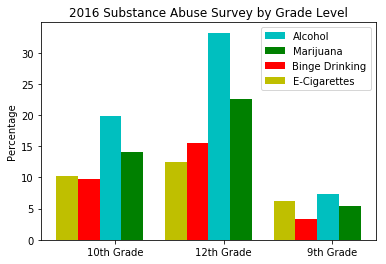

In [25]:
x = substance_bygrade.index
y_alcohol = substance_bygrade['Alcohol2/']
y_marijuana = substance_bygrade['Marijuana']
y_bingedrinking = substance_bygrade['Binge drinking3/']
y_ecigarette = substance_bygrade['E-cigarettes']
_X = np.arange(len(x))

width =.2
plt.ylabel('Percentage')
plt.title('2016 Substance Abuse Survey by Grade Level')
plt.xticks(_X + width / 5, ('10th Grade','12th Grade','9th Grade'))

plt.bar(_X, y_alcohol,width, color='c',label='Alcohol')
plt.bar(_X + width, y_marijuana,width, color='g', label='Marijuana')
plt.bar(_X - width, y_bingedrinking,width, color='r', label='Binge Drinking')
plt.bar(_X-2*(width), y_ecigarette,width, color='y', label='E-Cigarettes')

plt.legend(loc='best')

plt.show


### Graph by Sex

In [13]:
group_summary=group_test.pivot_table(index='demography',
                                     columns='Substance',
                                     values = '2016')
group_summary

Substance,Alcohol2/,Binge drinking3/,Cigarettes,Cocaine,E-cigarettes,Inhalants,MDMA (Ecstasy)1/,Marijuana
demography,,,,,,,,
All 10th graders,19.900000,9.700000,4.900000,0.400000,10.300000,1.000000,0.500000,14.000000
All 12th graders,33.200000,15.500000,10.500000,0.900000,12.400000,0.800000,0.900000,22.500000
All 8th graders,7.300000,3.400000,2.600000,0.300000,6.200000,1.800000,0.300000,5.400000
Black or African American,12.900000,5.066667,3.033333,0.366667,4.700000,1.300000,0.533333,14.800000
Female,20.233333,8.966667,5.033333,0.300000,7.666667,1.300000,0.400000,12.800000
Male,19.933333,10.000000,6.733333,0.700000,11.466667,1.000000,0.666667,14.966667
White,22.566667,10.733333,7.433333,0.366667,11.233333,1.033333,0.533333,13.366667


<function matplotlib.pyplot.show(*args, **kw)>

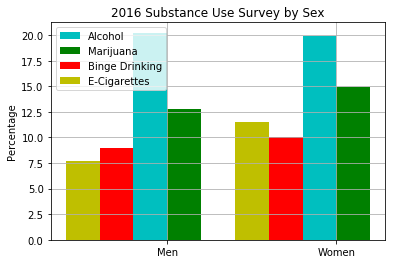

In [26]:
group_by_sex = group_summary.drop(['All 10th graders','All 12th graders','All 8th graders','Black or African American','White'])

x = group_by_sex.index
y_alcohol = group_by_sex['Alcohol2/']
y_marijuana = group_by_sex['Marijuana']
y_bingedrinking = group_by_sex['Binge drinking3/']
y_ecigarette = group_by_sex['E-cigarettes']
_X = np.arange(len(x))

width =.2
plt.ylabel('Percentage')
plt.title('2016 Substance Use Survey by Sex')
plt.xticks(_X + width / 2, ('Men','Women'))

plt.bar(_X, y_alcohol,width, color='c',label='Alcohol')
plt.bar(_X + width, y_marijuana,width, color='g', label='Marijuana')
plt.bar(_X - width, y_bingedrinking,width, color='r', label='Binge Drinking')
plt.bar(_X-2*(width), y_ecigarette,width, color='y', label='E-Cigarettes')

plt.legend(loc='best')
plt.grid()

plt.show

### Graph by Race 

<function matplotlib.pyplot.show(*args, **kw)>

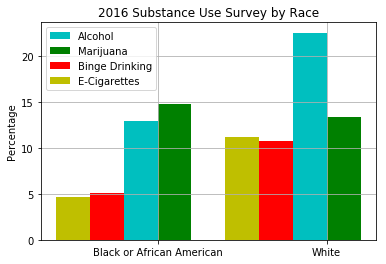

In [30]:
group_by_race = group_summary.drop(['All 10th graders','All 12th graders','All 8th graders','Male','Female'])

x = group_by_race.index
y_alcohol = group_by_race['Alcohol2/']
y_marijuana = group_by_race['Marijuana']
y_bingedrinking = group_by_race['Binge drinking3/']
y_ecigarette = group_by_race['E-cigarettes']
_X = np.arange(len(x))

width =.2
plt.ylabel('Percentage')
plt.title('2016 Substance Use Survey by Race')
plt.xticks(_X + width / 2, ('Black or African American','White'))

plt.bar(_X, y_alcohol,width, color='c',label='Alcohol')
plt.bar(_X + width, y_marijuana,width, color='g', label='Marijuana')
plt.bar(_X - width, y_bingedrinking,width, color='r', label='Binge Drinking')
plt.bar(_X-2*(width), y_ecigarette,width, color='y', label='E-Cigarettes')

plt.legend(loc='best')
plt.grid()

plt.show

### ACCIDENTAL DEATHS DUE TO SUBSTANCE

In [ ]:
df1.head()

In [ ]:
group_test1 = df1[['Sex','Tramad','Morphine_NotHeroin','Age']]
group_test1.head()

In [ ]:
#create dataframe by sex
sex = group_test1
sex=sex.set_index('Sex')

#delete unwanted rows
#sex = sex.drop(['NaN'])

#rearrange data grouping by substance
sex.reset_index()
substance_bysex = sex.pivot_table(index='Sex',
                                     columns='Tramad',
                                     values = 'Age')
substance_bysex

In [ ]:
x = substance_bysex.index
y_age = substance_bysex['Y']


width =.2
plt.ylabel('Age')
plt.title('Deaths by Age Due To Tramad Abuse')


plt.bar(x, y_age, color='b',label='Tramad')


plt.legend(loc='best')

plt.show
